<a href="https://colab.research.google.com/github/Morsal-stack/EuropeanFunds/blob/main/Progetto_OpenCoesione_Nazionale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz

!tar xf spark-2.3.1-bin-hadoop2.7.tgz

!pip install -q findspark

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

!ls



import findspark

findspark.init()


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [ ]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
#from pyspark.sql import functions as F
from pyspark.sql.functions import when, col, isnull, count, isnan
from pyspark.sql.types import FloatType
spark = SparkSession.builder.master("local[*]").getOrCreate()
sqlContext = SQLContext(spark)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import seaborn as sb
import plotly.express as pex
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

In [ ]:
PfProgetti07131 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/ABRUZZO/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti07132 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/BASILICATA/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti07133 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/CALABRIA/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti07134 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/CAMPANIA/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti07135 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/EMILIA ROMAGNA/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti07136 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/FRIULI VENEZIA GIULIA/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti07137 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/LAZIO/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti07138 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/LIGURIA/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti07139 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/LOMBARDIA/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti071310 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/MARCHE/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti071311 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/MOLISE/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti071312 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/PIEMONTE/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti071313 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/PUGLIA/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti071314 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/SARDEGNA/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti071315 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/SICILIA/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti071316 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/TOSCANA/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti071317 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/TRENTINO/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti071318 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/UMBRIA/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti071319 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/VALLE D'AOSTA/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti071320 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/VENETO/2007-2013.csv", sep=';', low_memory=False, encoding='latin-1')

PfProgetti0713 = pd.concat([PfProgetti07131,
                            PfProgetti07132,
                            PfProgetti07133,
                            PfProgetti07134,
                            PfProgetti07135,
                            PfProgetti07136,
                            PfProgetti07137,
                            PfProgetti07138,
                            PfProgetti07139,
                            PfProgetti071310,
                            PfProgetti071311,
                            PfProgetti071312,
                            PfProgetti071313,
                            PfProgetti071314,
                            PfProgetti071315,
                            PfProgetti071316,
                            PfProgetti071317,
                            PfProgetti071318,
                            PfProgetti071319,
                            PfProgetti071320
                            ])
PfProgetti0713.head(3)


,COD_LOCALE_PROGETTO,CUP,OC_TEMA_SINTETICO,FONDO_COMUNITARIO,OC_DESCR_CATEGORIA_SPESA,CUP_DESCR_NATURA,CUP_DESCR_TIPOLOGIA,DEN_PROVINCIA,DEN_REGIONE,FINANZ_TOTALE_PUBBLICO
0,17EMPG/2015/203130,E39J14003450005,Agenda digitale,FESR,Servizi e applicazioni per le PMI (e-Commerc...,CONCESSIONE DI INCENTIVI AD UNITA' PRODUTTIVE,AMMODERNAMENTO,PESCARA,ABRUZZO,24350
1,1APP00PROG_DDP_17/2017,C77H16001220001,Trasporti e infrastrutture a rete,,,REALIZZAZIONE DI LAVORI PUBBLICI (OPERE ED IMP...,Manutenzione straordinaria,PESCARA,ABRUZZO,1280000
2,1APT04FSCCIVITELLATRO1,E77H16001490002,Trasporti e infrastrutture a rete,,,REALIZZAZIONE DI LAVORI PUBBLICI (OPERE ED IMP...,Manutenzione straordinaria,TERAMO,ABRUZZO,1200000


In [ ]:
PfProgetti0713['DEN_PROVINCIA'].unique() 

array(['PESCARA', 'TERAMO', "L'AQUILA", 'CHIETI', 'MATERA', 'POTENZA',
       'COSENZA', 'REGGIO CALABRIA', 'CATANZARO', 'VIBO VALENTIA',
       'CROTONE', 'NAPOLI', 'AVELLINO', 'SALERNO', 'BENEVENTO', 'CASERTA',
       'RAVENNA', 'BOLOGNA', 'REGGIO EMILIA', "FORLI'-CESENA", 'PIACENZA',
       'MODENA', 'FERRARA', 'PARMA', 'RIMINI', 'GORIZIA', 'TRIESTE',
       'UDINE', 'PORDENONE', 'ROMA', 'RIETI', 'FROSINONE', 'VITERBO',
       'LATINA', 'GENOVA', 'LA SPEZIA', 'SAVONA', 'IMPERIA', 'BRESCIA',
       'MILANO', 'CREMONA', 'COMO', 'PAVIA', 'MANTOVA',
       'MONZA E DELLA BRIANZA', 'BERGAMO', 'LECCO', 'VARESE', 'LODI',
       'SONDRIO', ' ', 'PESARO E URBINO', 'MACERATA', 'ASCOLI PICENO',
       'ANCONA', 'FERMO', 'CAMPOBASSO', 'ISERNIA', 'TORINO',
       'ALESSANDRIA', 'ASTI', 'BIELLA', 'CUNEO', 'NOVARA',
       'VERBANO-CUSIO-OSSOLA', 'VERCELLI', 'TARANTO', 'BARI',
       'BARLETTA-ANDRIA-TRANI', 'LECCE', 'BRINDISI', 'FOGGIA', 'SASSARI',
       'NUORO', 'SUD SARDEGNA', 'ORISTANO', 'CAG

In [ ]:
PfProgetti0713['DEN_PROVINCIA'].value_counts()

MILANO                   115469
BRESCIA                   60469
BERGAMO                   45126
MONZA E DELLA BRIANZA     42085
VARESE                    37184
                          ...  
PARMA                      1088
VITERBO                     665
BELLUNO                     654
ROVIGO                      572
RIETI                       452
Name: DEN_PROVINCIA, Length: 108, dtype: int64

In [ ]:
PfProgetti0713['DEN_REGIONE'].unique() 

array(['ABRUZZO', 'BASILICATA', 'CALABRIA', 'CAMPANIA', 'EMILIA ROMAGNA',
       'FRIULI VENEZIA GIULIA', 'LAZIO', 'LIGURIA', 'LOMBARDIA', 'MARCHE',
       'MOLISE', 'PIEMONTE', 'PUGLIA', 'SARDEGNA', 'SICILIA', 'TOSCANA',
       'TRENTINO ALTO ADIGE', 'UMBRIA', 'VALLE D AOSTA', 'VENETO'],
      dtype=object)

In [ ]:
PfProgetti0713['DEN_REGIONE'].value_counts()

LOMBARDIA                405638
PUGLIA                    69975
TOSCANA                   66931
FRIULI VENEZIA GIULIA     60013
SICILIA                   50068
CAMPANIA                  48970
PIEMONTE                  37109
CALABRIA                  32526
MARCHE                    29341
ABRUZZO                   28249
SARDEGNA                  22709
EMILIA ROMAGNA            17330
LIGURIA                   17071
LAZIO                     13852
BASILICATA                11626
VENETO                    11537
UMBRIA                    11352
TRENTINO ALTO ADIGE        7289
MOLISE                     5644
VALLE D AOSTA              4106
Name: DEN_REGIONE, dtype: int64

In [ ]:
PfProgetti0713['OC_TEMA_SINTETICO'].unique()

array(['Agenda digitale', 'Trasporti e infrastrutture a rete',
       'Istruzione', 'Attrazione culturale, naturale e turistica',
       'Occupazione e mobilità dei lavoratori',
       'Ambiente e prevenzione dei rischi', 'Ricerca e innovazione',
       'Servizi di cura infanzia e anziani', 'Inclusione sociale',
       'Rinnovamento urbano  e rurale', 'Energia e efficienza energetica',
       'Competitività per le imprese', 'Rafforzamento capacità della PA',
       'Rafforzamento capacitï¿½ della PA',
       'Competitivitï¿½ per le imprese',
       'Occupazione e mobilitï¿½ dei lavoratori'], dtype=object)

In [ ]:
PfProgetti0713['OC_TEMA_SINTETICO'].value_counts()

Inclusione sociale                            324603
Istruzione                                    239142
Occupazione e mobilità dei lavoratori         200521
Occupazione e mobilitï¿½ dei lavoratori        70895
Ricerca e innovazione                          31612
Agenda digitale                                21395
Competitività per le imprese                   12205
Ambiente e prevenzione dei rischi              10523
Attrazione culturale, naturale e turistica     10015
Energia e efficienza energetica                 9660
Rinnovamento urbano  e rurale                   4572
Rafforzamento capacità della PA                 4484
Servizi di cura infanzia e anziani              4330
Competitivitï¿½ per le imprese                  3604
Trasporti e infrastrutture a rete               2219
Rafforzamento capacitï¿½ della PA               1556
Name: OC_TEMA_SINTETICO, dtype: int64

In [ ]:
PfProgetti0713['OC_DESCR_CATEGORIA_SPESA'].unique()

array(['Servizi e applicazioni  per le PMI  (e-Commercio, istruzione e formazione, reti, ecc.)',
       ' ',
       "Sviluppo di potenziale umano nel settore della ricerca e dell'innovazione, in particolare mediante studi post-graduate",
       "Misure per migliorare l'accesso all'occupazione e aumentare la partecipazione sostenibile e il progresso delle donne",
       "Misure per aumentare la partecipazione all'istruzione e alla formazione in tutto il ciclo di vita",
       "Progettazione, introduzione e attuazione di riforme dei sistemi dell'istruzione e della formazione",
       'Misure che incoraggiano un invecchiamento attivo e prolungano la vita di lavoro',
       'Aeroporti', 'Porti', 'Trasporti multimodali', 'Ferrovie',
       'Trasporti urbani', 'Trasporti multimodali (TEN-T)',
       'Strade regionali/locali',
       'Mitigazione e adattamento al cambiamento climatico',
       "Altre misure per tutelare l'ambiente e prevenire i rischi",
       'Prevenzione dei rischi (inclusa

In [ ]:
PfProgetti0713['OC_DESCR_CATEGORIA_SPESA'].value_counts()

Vie verso l'integrazione e il rientro nel mondo del lavoro per le persone svantaggiate                                                                               320503
Misure per aumentare la partecipazione all'istruzione e alla formazione in tutto il ciclo di vita                                                                    124199
Attuazione di misure attive e preventive sul mercato del lavoro                                                                                                       92266
Sviluppo di sistemi e strategie di apprendimento permanente nelle imprese; formazione e servizi per i dipendenti                                                      68755
Sviluppo di servizi speciali per l'occupazione, la formazione e il sostegno connessi alla ristrutturazione settoriale                                                 67224
                                                                                                                                            

In [ ]:
PfProgetti0713['CUP_DESCR_NATURA'].unique()

array(["CONCESSIONE DI INCENTIVI AD UNITA' PRODUTTIVE",
       'REALIZZAZIONE DI LAVORI PUBBLICI (OPERE ED IMPIANTISTICA)',
       "CONCESSIONE DI CONTRIBUTI AD ALTRI SOGGETTI (DIVERSI DA UNITA' PRODUTTIVE)",
       'ACQUISTO O REALIZZAZIONE DI SERVIZI', 'ACQUISTO DI BENI',
       'SOTTOSCRIZIONE INIZIALE O AUMENTO DI CAPITALE SOCIALE (COMPRESI SPIN OFF), FONDI DI RISCHIO O DI GARANZIA',
       ' '], dtype=object)

In [ ]:
PfProgetti0713['CUP_DESCR_NATURA'].value_counts()

CONCESSIONE DI CONTRIBUTI AD ALTRI SOGGETTI (DIVERSI DA UNITA' PRODUTTIVE)                                   479627
ACQUISTO O REALIZZAZIONE DI SERVIZI                                                                          308640
CONCESSIONE DI INCENTIVI AD UNITA' PRODUTTIVE                                                                 91389
REALIZZAZIONE DI LAVORI PUBBLICI (OPERE ED IMPIANTISTICA)                                                     37984
ACQUISTO DI BENI                                                                                              33560
                                                                                                                 77
SOTTOSCRIZIONE INIZIALE O AUMENTO DI CAPITALE SOCIALE (COMPRESI SPIN OFF), FONDI DI RISCHIO O DI GARANZIA        59
Name: CUP_DESCR_NATURA, dtype: int64

In [ ]:
PfProgetti0713['FONDO_COMUNITARIO'].value_counts()

FSE     800341
FESR    104965
         46030
Name: FONDO_COMUNITARIO, dtype: int64

In [ ]:
PfProgetti14201 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/ABRUZZO/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti14202 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/BASILICATA/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti14203 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/CALABRIA/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti14204 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/CAMPANIA/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti14205 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/EMILIA ROMAGNA/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti14206 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/FRIULI VENEZIA GIULIA/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti14207 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/LAZIO/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti14208 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/LIGURIA/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti14209 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/LOMBARDIA/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti142010 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/MARCHE/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti142011 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/MOLISE/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti142012 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/PIEMONTE/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti142013 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/PUGLIA/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti142014 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/SARDEGNA/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti142015 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/SICILIA/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti142016 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/TOSCANA/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti142017 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/TRENTINO/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti142018 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/UMBRIA/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti142019 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/VALLE D'AOSTA/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')
PfProgetti142020 = pd.read_csv("/content/drive/MyDrive/opencoesione csv/VENETO/2014-2020.csv", sep=';', low_memory=False, encoding='latin-1')

PfProgetti1420 = pd.concat([PfProgetti14201,
                            PfProgetti14202,
                            PfProgetti14203,
                            PfProgetti14204,
                            PfProgetti14205,
                            PfProgetti14206,
                            PfProgetti14207,
                            PfProgetti14208,
                            PfProgetti14209,
                            PfProgetti142010,
                            PfProgetti142011,
                            PfProgetti142012,
                            PfProgetti142013,
                            PfProgetti142014,
                            PfProgetti142015,
                            PfProgetti142016,
                            PfProgetti142017,
                            PfProgetti142018,
                            PfProgetti142019,
                            PfProgetti142020
                            ])
PfProgetti1420.head(3)


,COD_LOCALE_PROGETTO,CUP,OC_TEMA_SINTETICO,FONDO_COMUNITARIO,OC_DESCR_CATEGORIA_SPESA,CUP_DESCR_NATURA,CUP_DESCR_TIPOLOGIA,DEN_PROVINCIA,DEN_REGIONE,FINANZ_TOTALE_PUBBLICO,Unnamed: 10,Unnamed: 11
0,10SI16929,G75J17006150006,Istruzione,FSE,Miglioramento della paritÃ di accesso all'app...,CONCESSIONE DI CONTRIBUTI AD ALTRI SOGGETTI (D...,Altro,CHIETI,ABRUZZO,375,NaN,NaN
1,10UMFSE1420-18-1-81-1006-3F6939E8,I14E17001220009,Occupazione e mobilità dei lavoratori,FSE,Accesso all'occupazione per le persone in cerc...,ACQUISTO O REALIZZAZIONE DI SERVIZI,Altro,TERAMO,ABRUZZO,3000,NaN,NaN
2,10UMFSE1420-18-1-81-1006-8C212E19,I15F17000100009,Occupazione e mobilità dei lavoratori,FSE,Accesso all'occupazione per le persone in cerc...,ACQUISTO O REALIZZAZIONE DI SERVIZI,Altro,TERAMO,ABRUZZO,3000,NaN,NaN


In [ ]:
PfProgetti1420['OC_DESCR_CATEGORIA_SPESA'].unique()

array(["Miglioramento della paritÃ\xa0 di accesso all'apprendimento lungo tutto l'arco della vita per tutte le fasce di etÃ\xa0 in contesti formali, non formali e informali, innalzamento delle conoscenze, delle cap",
       "Accesso all'occupazione per le persone in cerca di lavoro e le persone inattive, compresi i disoccupati di lunga durata e le persone distanti dal mercato del lavoro, anche attraverso iniziative locali",
       "Inserimento sostenibile dei giovani nel mercato del lavoro, in particolare di quelli disoccupati e non iscritti a corsi d'istruzione o di formazione, compresi i giovani a rischio di esclusione sociale",
       "Miglioramento della qualitÃ\xa0 e dell'efficienza e dell'accessibilitÃ\xa0 all'istruzione terziaria e di livello equivalente al fine di aumentare la partecipazione e i livelli di istruzione, in particolare",
       'Altre infrastrutture sociali che contribuiscono allo sviluppo regionale e locale',
       'CapacitÃ\xa0 istituzionale delle pubbliche amm

In [ ]:
PfProgetti1420['OC_DESCR_CATEGORIA_SPESA'].value_counts()

Inserimento sostenibile dei giovani nel mercato del lavoro, in particolare di quelli disoccupati e non iscritti a corsi d'istruzione o di formazione, compresi i giovani a rischio di esclusione sociale    248429
Accesso all'occupazione per le persone in cerca di lavoro e le persone inattive, compresi i disoccupati di lunga durata e le persone distanti dal mercato del lavoro, anche attraverso iniziative locali    165681
Riduzione e prevenzione dell'abbandono scolastico prematuro e promozione della paritÃ  di accesso a un'istruzione prescolare, primaria e secondaria di qualitÃ , inclusi i percorsi di apprendimento di      85988
                                                                                                                                                                                                             40198
Adattamento al cambiamento da parte di lavoratori, imprese e imprenditori                                                                                   

In [ ]:
PfProgetti1420['CUP_DESCR_NATURA'].unique()

array(["CONCESSIONE DI CONTRIBUTI AD ALTRI SOGGETTI (DIVERSI DA UNITA' PRODUTTIVE)",
       'ACQUISTO O REALIZZAZIONE DI SERVIZI',
       'REALIZZAZIONE DI LAVORI PUBBLICI (OPERE ED IMPIANTISTICA)',
       "CONCESSIONE DI INCENTIVI AD UNITA' PRODUTTIVE",
       'ACQUISTO DI BENI',
       'SOTTOSCRIZIONE INIZIALE O AUMENTO DI CAPITALE SOCIALE (COMPRESI SPIN OFF), FONDI DI RISCHIO O DI GARANZIA'],
      dtype=object)

In [ ]:
PfProgetti1420['CUP_DESCR_NATURA'].value_counts()

ACQUISTO O REALIZZAZIONE DI SERVIZI                                                                          357917
CONCESSIONE DI CONTRIBUTI AD ALTRI SOGGETTI (DIVERSI DA UNITA' PRODUTTIVE)                                   212169
CONCESSIONE DI INCENTIVI AD UNITA' PRODUTTIVE                                                                114445
REALIZZAZIONE DI LAVORI PUBBLICI (OPERE ED IMPIANTISTICA)                                                     31527
ACQUISTO DI BENI                                                                                              30200
SOTTOSCRIZIONE INIZIALE O AUMENTO DI CAPITALE SOCIALE (COMPRESI SPIN OFF), FONDI DI RISCHIO O DI GARANZIA        60
Name: CUP_DESCR_NATURA, dtype: int64

In [ ]:
PfProgetti1420['FONDO_COMUNITARIO'].value_counts()

FSE      396923
IOG      190721
FESR     118456
          39948
FEASR       250
ENI          20
Name: FONDO_COMUNITARIO, dtype: int64

In [ ]:
PfProgetti1420['DEN_PROVINCIA'].value_counts()

MILANO                  73193
FIRENZE                 48913
BRESCIA                 28326
ROMA                    27509
BERGAMO                 26516
                        ...  
NOVARA                    829
ASTI                      700
BIELLA                    553
VERCELLI                  527
VERBANO-CUSIO-OSSOLA      473
Name: DEN_PROVINCIA, Length: 107, dtype: int64

In [ ]:
PfProgetti1420['DEN_REGIONE'].value_counts()

LOMBARDIA                215639
TOSCANA                  139435
LAZIO                     52576
VENETO                    38014
PUGLIA                    37926
SICILIA                   37147
CAMPANIA                  33051
EMILIA ROMAGNA            29308
FRIULI VENEZIA GIULIA     25749
MARCHE                    22199
LIGURIA                   15617
SARDEGNA                  14975
BASILICATA                14938
ABRUZZO                   14853
UMBRIA                    13891
PIEMONTE                  13258
CALABRIA                  11487
MOLISE                     7508
TRENTINO ALTO ADIGE        6300
VALLE D AOSTA              2447
Name: DEN_REGIONE, dtype: int64

# **Analisi nazionale numerica e relativi grafici.**



Si è proceduto infine ad analizzare le due Programmazioni Comunitarie, partendo dalla distribuzione del numero dei progetti avviati dai soggetti beneficiari dei finanziamenti insistenti sul tutto il territorio nazionale.

[Text(0, 0, 'ABRUZZO'),
 Text(0, 0, 'BASILICATA'),
 Text(0, 0, 'CALABRIA'),
 Text(0, 0, 'CAMPANIA'),
 Text(0, 0, 'EMILIA ROMAGNA'),
 Text(0, 0, 'FRIULI VENEZIA GIULIA'),
 Text(0, 0, 'LAZIO'),
 Text(0, 0, 'LIGURIA'),
 Text(0, 0, 'LOMBARDIA'),
 Text(0, 0, 'MARCHE'),
 Text(0, 0, 'MOLISE'),
 Text(0, 0, 'PIEMONTE'),
 Text(0, 0, 'PUGLIA'),
 Text(0, 0, 'SARDEGNA'),
 Text(0, 0, 'SICILIA'),
 Text(0, 0, 'TOSCANA'),
 Text(0, 0, 'TRENTINO ALTO ADIGE'),
 Text(0, 0, 'UMBRIA'),
 Text(0, 0, 'VALLE D AOSTA'),
 Text(0, 0, 'VENETO')]

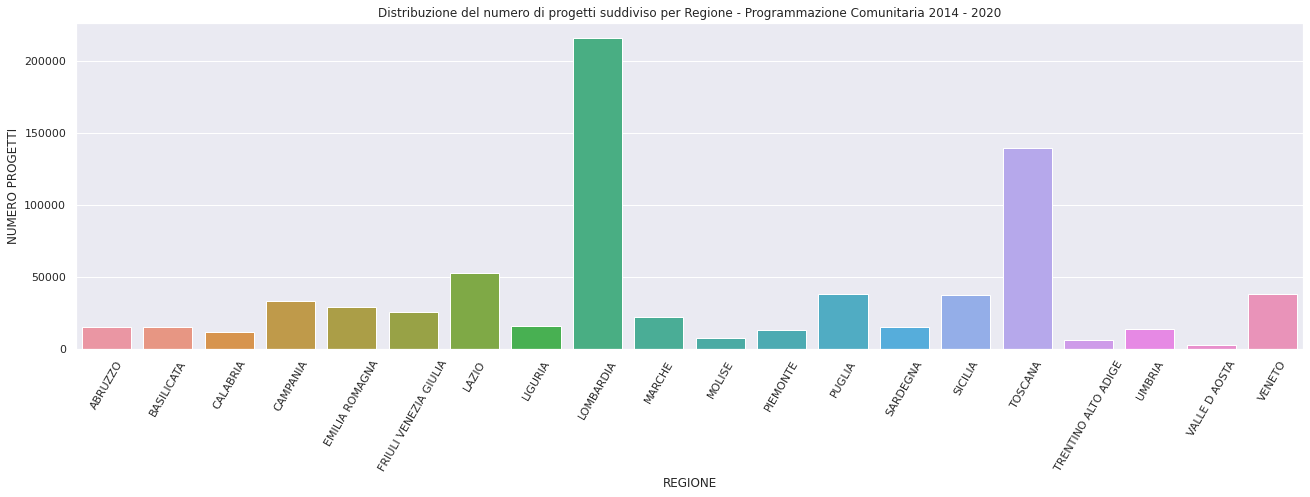

In [ ]:
sb.set(rc={'figure.figsize':(22,6)})
ax = sb.countplot(x="DEN_REGIONE", data = PfProgetti1420)
pp.title("Distribuzione del numero di progetti suddiviso per Regione - Programmazione Comunitaria 2014 - 2020")
pp.xlabel('REGIONE')
pp.ylabel('NUMERO PROGETTI')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)


[Text(0, 0, 'ABRUZZO'),
 Text(0, 0, 'BASILICATA'),
 Text(0, 0, 'CALABRIA'),
 Text(0, 0, 'CAMPANIA'),
 Text(0, 0, 'EMILIA ROMAGNA'),
 Text(0, 0, 'FRIULI VENEZIA GIULIA'),
 Text(0, 0, 'LAZIO'),
 Text(0, 0, 'LIGURIA'),
 Text(0, 0, 'LOMBARDIA'),
 Text(0, 0, 'MARCHE'),
 Text(0, 0, 'MOLISE'),
 Text(0, 0, 'PIEMONTE'),
 Text(0, 0, 'PUGLIA'),
 Text(0, 0, 'SARDEGNA'),
 Text(0, 0, 'SICILIA'),
 Text(0, 0, 'TOSCANA'),
 Text(0, 0, 'TRENTINO ALTO ADIGE'),
 Text(0, 0, 'UMBRIA'),
 Text(0, 0, 'VALLE D AOSTA'),
 Text(0, 0, 'VENETO')]

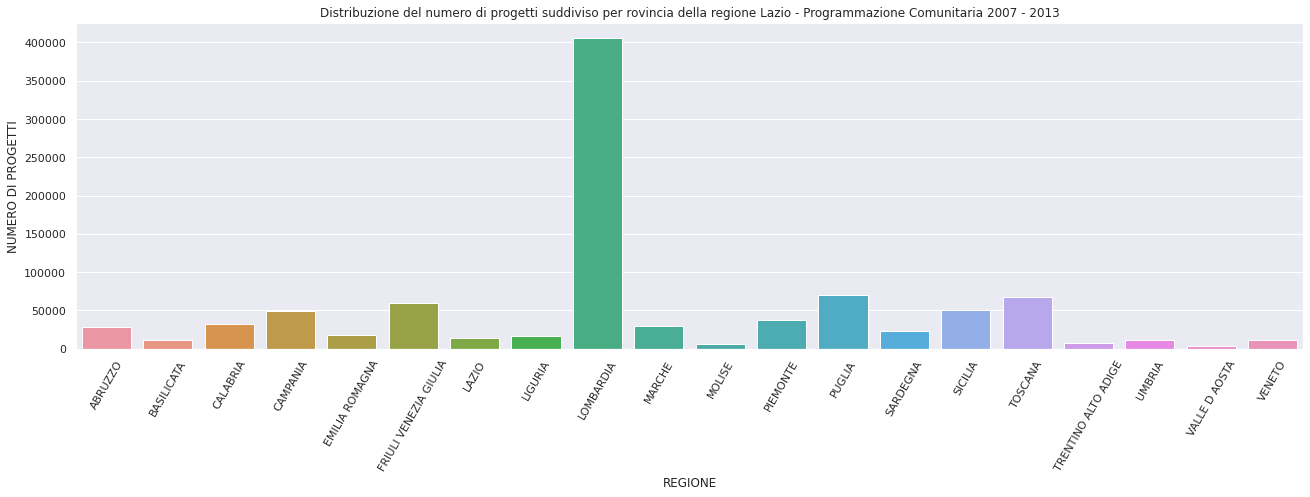

In [ ]:
sb.set(rc={'figure.figsize':(22,6)})
ax = sb.countplot(x="DEN_REGIONE", data = PfProgetti0713)
pp.title("Distribuzione del numero di progetti suddiviso per rovincia della regione Lazio - Programmazione Comunitaria 2007 - 2013")
pp.xlabel('REGIONE')
pp.ylabel('NUMERO DI PROGETTI')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)


In [ ]:
PfProgetti1420['FINANZ_TOTALE_PUBBLICO'] = PfProgetti1420.FINANZ_TOTALE_PUBBLICO.str.replace(',', '.').astype(float)
PfProgetti1420.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746318 entries, 0 to 38013
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   COD_LOCALE_PROGETTO       746318 non-null  object 
 1   CUP                       746318 non-null  object 
 2   OC_TEMA_SINTETICO         746318 non-null  object 
 3   FONDO_COMUNITARIO         746318 non-null  object 
 4   OC_DESCR_CATEGORIA_SPESA  746318 non-null  object 
 5   CUP_DESCR_NATURA          746318 non-null  object 
 6   CUP_DESCR_TIPOLOGIA       746318 non-null  object 
 7   DEN_PROVINCIA             746318 non-null  object 
 8   DEN_REGIONE               746318 non-null  object 
 9   FINANZ_TOTALE_PUBBLICO    746318 non-null  float64
 10  Unnamed: 10               0 non-null       float64
 11  Unnamed: 11               0 non-null       float64
dtypes: float64(3), object(9)
memory usage: 94.0+ MB


In [ ]:
PfProgetti0713['FINANZ_TOTALE_PUBBLICO'] = PfProgetti0713.FINANZ_TOTALE_PUBBLICO.str.replace(',', '.').astype(float)
PfProgetti0713.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951336 entries, 0 to 11536
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   COD_LOCALE_PROGETTO       951336 non-null  object 
 1   CUP                       951336 non-null  object 
 2   OC_TEMA_SINTETICO         951336 non-null  object 
 3   FONDO_COMUNITARIO         951336 non-null  object 
 4   OC_DESCR_CATEGORIA_SPESA  951336 non-null  object 
 5   CUP_DESCR_NATURA          951336 non-null  object 
 6   CUP_DESCR_TIPOLOGIA       951336 non-null  object 
 7   DEN_PROVINCIA             951336 non-null  object 
 8   DEN_REGIONE               951336 non-null  object 
 9   FINANZ_TOTALE_PUBBLICO    951336 non-null  float64
dtypes: float64(1), object(9)
memory usage: 99.8+ MB


Da come si può evincere, Roma è la provincia avente il maggior numero di progetti finanziati attraverso la programmazione comunitaria 2014-2020. 
Con il seguente step si è voluto verificare se questa fosse anche la provincia avente il maggior importo dei finanziamenti che insistono per l'appunto sul territorio capitolino.
Pertanto si è convertito il campo FINANZ_TOTALE_PUBBLICO dal tipo object al tipo float grazie alla funzione astype, provvedendo a sostituire la virgola che delimita i decimali con il punto.
Il grafico successivo è stato realizzato con l'intento di mettere a confronto il numero dei progetti avviati e distribuiti per provincia, suddivisi per Programmazione Comunitaria.
Si evince come nella Programmazione 2014-2020 tutte le province abbiamo aumentato il numero dei progetti avviati e come Frosinone e Latina in particolare abbiano avuto l'incremento relativo maggiore, se confrontate con quanto svolto nella precedente programmazione.

[Text(0, 0, 'ABRUZZO'),
 Text(0, 0, 'BASILICATA'),
 Text(0, 0, 'CALABRIA'),
 Text(0, 0, 'CAMPANIA'),
 Text(0, 0, 'EMILIA ROMAGNA'),
 Text(0, 0, 'FRIULI VENEZIA GIULIA'),
 Text(0, 0, 'LAZIO'),
 Text(0, 0, 'LIGURIA'),
 Text(0, 0, 'LOMBARDIA'),
 Text(0, 0, 'MARCHE'),
 Text(0, 0, 'MOLISE'),
 Text(0, 0, 'PIEMONTE'),
 Text(0, 0, 'PUGLIA'),
 Text(0, 0, 'SARDEGNA'),
 Text(0, 0, 'SICILIA'),
 Text(0, 0, 'TOSCANA'),
 Text(0, 0, 'TRENTINO ALTO ADIGE'),
 Text(0, 0, 'UMBRIA'),
 Text(0, 0, 'VALLE D AOSTA'),
 Text(0, 0, 'VENETO')]

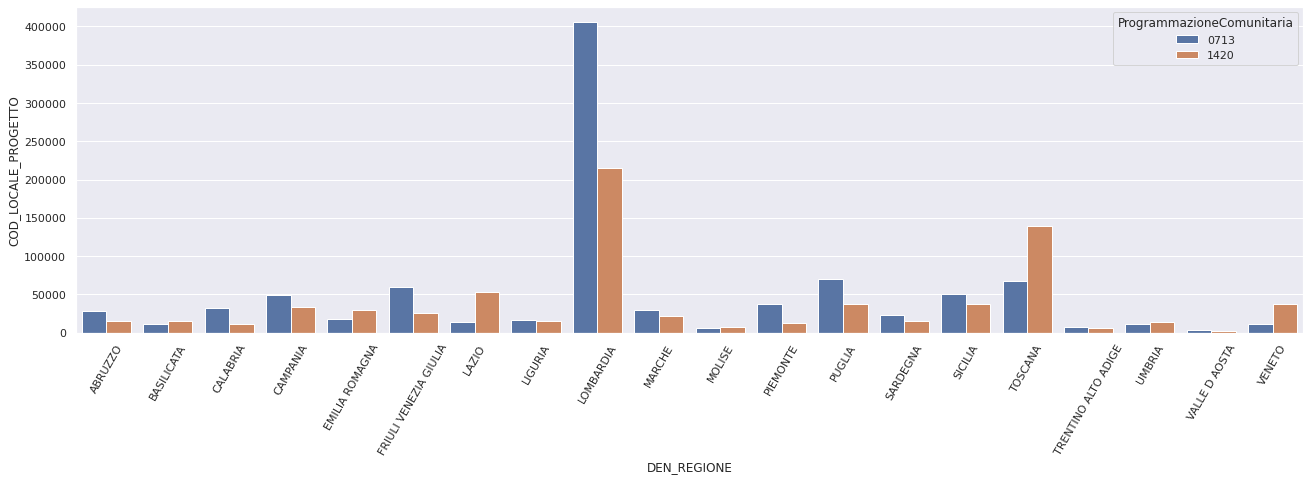

In [ ]:
PfProgetti1420TOTProgetti = PfProgetti1420.drop(columns=['CUP','DEN_PROVINCIA',
 'OC_TEMA_SINTETICO',
 'FONDO_COMUNITARIO',
 'OC_DESCR_CATEGORIA_SPESA',
 'CUP_DESCR_NATURA',
 'CUP_DESCR_TIPOLOGIA',
 'FINANZ_TOTALE_PUBBLICO'])
PfProgetti1420TOTProgetti = PfProgetti1420TOTProgetti.groupby('DEN_REGIONE',as_index=False).count()
PfProgetti1420TOTProgetti.head(10)
PfProgetti0713TOTProgetti = PfProgetti0713.drop(columns=['CUP','DEN_PROVINCIA',
 'OC_TEMA_SINTETICO',
 'FONDO_COMUNITARIO',
 'OC_DESCR_CATEGORIA_SPESA',
 'CUP_DESCR_NATURA',
 'CUP_DESCR_TIPOLOGIA',
 'FINANZ_TOTALE_PUBBLICO'])
PfProgetti0713TOTProgetti = PfProgetti0713TOTProgetti.groupby('DEN_REGIONE',as_index=False).count()

PfProgetti0713TOTProgetti.head(10)

anno0713 = pd.DataFrame({"DEN_REGIONE": 
                         ['ABRUZZO',
                          'BASILICATA',
                          'CALABRIA',
                          'CAMPANIA',
                          'EMILIA ROMAGNA',
                          'FRIULI VENEZIA GIULIA',
                          'LAZIO',
                          'LIGURIA',
                          'LOMBARDIA',
                          'MARCHE',
                          'MOLISE',
                          'PIEMONTE',
                          'PUGLIA',
                          'SARDEGNA',
                          'SICILIA',
                          'TOSCANA',
                          'TRENTINO ALTO ADIGE',
                          'UMBRIA',
                          'VALLE D AOSTA',
                          'VENETO'
                          ],
                         "ProgrammazioneComunitaria" : ['0713','0713','0713','0713','0713',
                         '0713','0713','0713','0713','0713',
                         '0713','0713','0713','0713','0713',
                         '0713','0713','0713','0713','0713'
                         ]})
anno0713.head(10)
anno1420 = pd.DataFrame({"DEN_REGIONE": 
                          ['ABRUZZO',
                          'BASILICATA',
                          'CALABRIA',
                          'CAMPANIA',
                          'EMILIA ROMAGNA',
                          'FRIULI VENEZIA GIULIA',
                          'LAZIO',
                          'LIGURIA',
                          'LOMBARDIA',
                          'MARCHE',
                          'MOLISE',
                          'PIEMONTE',
                          'PUGLIA',
                          'SARDEGNA',
                          'SICILIA',
                          'TOSCANA',
                          'TRENTINO ALTO ADIGE',
                          'UMBRIA',
                          'VALLE D AOSTA',
                          'VENETO'
                          ],
                         "ProgrammazioneComunitaria" : ['1420','1420','1420','1420','1420',
                                                        '1420','1420','1420','1420','1420',
                                                        '1420','1420','1420','1420','1420',
                                                        '1420','1420','1420','1420','1420']})

ProgettiXProvincia0713TOTProgetti = pd.merge(PfProgetti0713TOTProgetti, anno0713 ,how='inner', on='DEN_REGIONE')
ProgettiXProvincia0713TOTProgetti.head(10)

ProgettiXProvincia1420TOTProgetti = pd.merge(PfProgetti1420TOTProgetti, anno1420 ,how='inner', on='DEN_REGIONE')
ProgettiXProvincia1420TOTProgetti.head(10)

ProgettiXProvinciaTOTProgetti = pd.concat([ProgettiXProvincia0713TOTProgetti,ProgettiXProvincia1420TOTProgetti],ignore_index=True) 
ProgettiXProvinciaTOTProgetti.head(15)

ax = sb.barplot(x = "DEN_REGIONE", y = "COD_LOCALE_PROGETTO", hue="ProgrammazioneComunitaria", data = ProgettiXProvinciaTOTProgetti)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)




In [ ]:
ProgettiXProvincia0713TOTProgetti.head(30)

,DEN_REGIONE,COD_LOCALE_PROGETTO,ProgrammazioneComunitaria
0,ABRUZZO,28249,0713
1,BASILICATA,11626,0713
2,CALABRIA,32526,0713
3,CAMPANIA,48970,0713
4,EMILIA ROMAGNA,17330,0713
5,FRIULI VENEZIA GIULIA,60013,0713
6,LAZIO,13852,0713
7,LIGURIA,17071,0713
8,LOMBARDIA,405638,0713
9,MARCHE,29341,0713


Nel grafico successivo si è voluto mettere a confronto il totale dell'importo finanziato e si è notato come Roma spicca in vetta anche per quanto riguarda quest'aspetto. Le province di Latina e Frosinone sebbene abbiamo aumentato notevolmente il numero di progetti avviati nella programmazione recente, non hanno seguito la stessa distribuzione per quanto riguarda gli importi.

[Text(0, 0, 'ABRUZZO'),
 Text(0, 0, 'BASILICATA'),
 Text(0, 0, 'CALABRIA'),
 Text(0, 0, 'CAMPANIA'),
 Text(0, 0, 'EMILIA ROMAGNA'),
 Text(0, 0, 'FRIULI VENEZIA GIULIA'),
 Text(0, 0, 'LAZIO'),
 Text(0, 0, 'LIGURIA'),
 Text(0, 0, 'LOMBARDIA'),
 Text(0, 0, 'MARCHE'),
 Text(0, 0, 'MOLISE'),
 Text(0, 0, 'PIEMONTE'),
 Text(0, 0, 'PUGLIA'),
 Text(0, 0, 'SARDEGNA'),
 Text(0, 0, 'SICILIA'),
 Text(0, 0, 'TOSCANA'),
 Text(0, 0, 'TRENTINO ALTO ADIGE'),
 Text(0, 0, 'UMBRIA'),
 Text(0, 0, 'VALLE D AOSTA'),
 Text(0, 0, 'VENETO')]

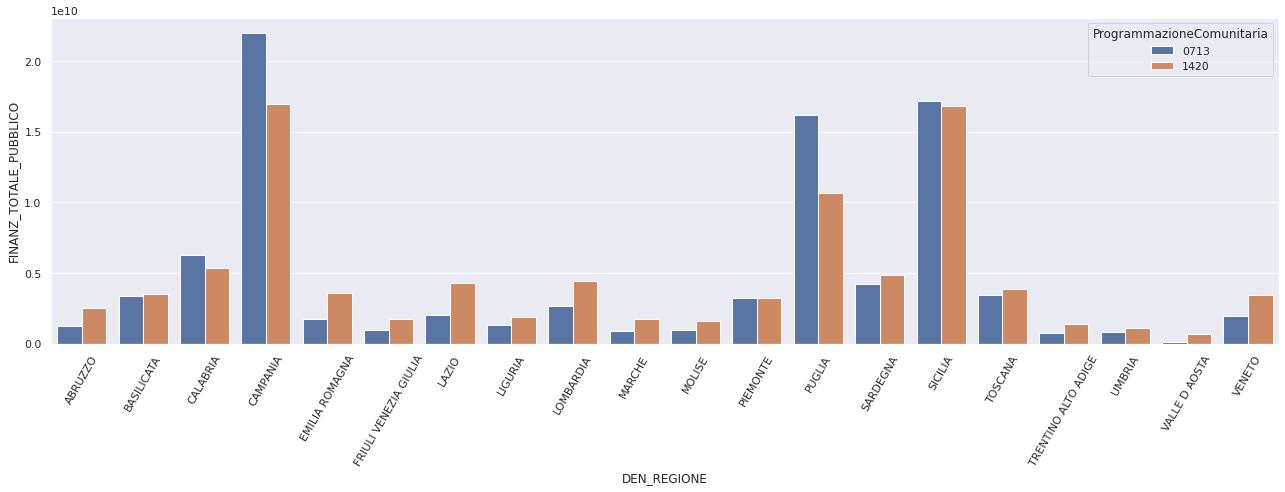

In [ ]:
PfProgetti1420TOTProgettiF = PfProgetti1420.drop(columns=[
'CUP',
'DEN_PROVINCIA',
'COD_LOCALE_PROGETTO',
 'OC_TEMA_SINTETICO',
 'FONDO_COMUNITARIO',
 'OC_DESCR_CATEGORIA_SPESA',
 'CUP_DESCR_NATURA',
 'CUP_DESCR_TIPOLOGIA'
 ])
PfProgetti1420TOTProgettiF = PfProgetti1420TOTProgettiF.groupby('DEN_REGIONE',as_index=False).sum()
PfProgetti1420TOTProgettiF.head(10)
PfProgetti0713TOTProgettiF = PfProgetti0713.drop(columns=[
 'CUP', 
 'DEN_PROVINCIA',
 'COD_LOCALE_PROGETTO',
 'OC_TEMA_SINTETICO',
 'FONDO_COMUNITARIO',
 'OC_DESCR_CATEGORIA_SPESA',
 'CUP_DESCR_NATURA',
 'CUP_DESCR_TIPOLOGIA'
 ])
PfProgetti0713TOTProgettiF = PfProgetti0713TOTProgettiF.groupby('DEN_REGIONE',as_index=False).sum()

PfProgetti0713TOTProgettiF.head(10)

anno0713 = pd.DataFrame({"DEN_REGIONE": 
                         ['ABRUZZO',
                          'BASILICATA',
                          'CALABRIA',
                          'CAMPANIA',
                          'EMILIA ROMAGNA',
                          'FRIULI VENEZIA GIULIA',
                          'LAZIO',
                          'LIGURIA',
                          'LOMBARDIA',
                          'MARCHE',
                          'MOLISE',
                          'PIEMONTE',
                          'PUGLIA',
                          'SARDEGNA',
                          'SICILIA',
                          'TOSCANA',
                          'TRENTINO ALTO ADIGE',
                          'UMBRIA',
                          'VALLE D AOSTA',
                          'VENETO'
                          ],
                         "ProgrammazioneComunitaria" : ['0713','0713','0713','0713','0713',
                         '0713','0713','0713','0713','0713',
                         '0713','0713','0713','0713','0713',
                         '0713','0713','0713','0713','0713'
                         ]})
anno0713.head(10)
anno1420 = pd.DataFrame({"DEN_REGIONE": 
                          ['ABRUZZO',
                          'BASILICATA',
                          'CALABRIA',
                          'CAMPANIA',
                          'EMILIA ROMAGNA',
                          'FRIULI VENEZIA GIULIA',
                          'LAZIO',
                          'LIGURIA',
                          'LOMBARDIA',
                          'MARCHE',
                          'MOLISE',
                          'PIEMONTE',
                          'PUGLIA',
                          'SARDEGNA',
                          'SICILIA',
                          'TOSCANA',
                          'TRENTINO ALTO ADIGE',
                          'UMBRIA',
                          'VALLE D AOSTA',
                          'VENETO'
                          ],
                         "ProgrammazioneComunitaria" : ['1420','1420','1420','1420','1420',
                                                        '1420','1420','1420','1420','1420',
                                                        '1420','1420','1420','1420','1420',
                                                        '1420','1420','1420','1420','1420']})


ProgettiXProvincia0713TOTProgettiF = pd.merge(PfProgetti0713TOTProgettiF, anno0713 ,how='inner', on='DEN_REGIONE')
ProgettiXProvincia0713TOTProgettiF.head(10)

ProgettiXProvincia1420TOTProgettiF = pd.merge(PfProgetti1420TOTProgettiF, anno1420 ,how='inner', on='DEN_REGIONE')
ProgettiXProvincia1420TOTProgettiF.head(10)

ProgettiXProvinciaTOTF = pd.concat([ProgettiXProvincia0713TOTProgettiF,ProgettiXProvincia1420TOTProgettiF],ignore_index=True) 
ProgettiXProvinciaTOTF.head(15)

ax = sb.barplot(x = "DEN_REGIONE", y = "FINANZ_TOTALE_PUBBLICO", hue="ProgrammazioneComunitaria", data = ProgettiXProvinciaTOTF)


ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)


# **Analisi nazionale di contesto e relativi grafici.**

Nella seguente fase si è realizzata l'analisi di contesto. Da qui si può evincere su quali settori, o tematiche, siano stati distribuiti i finanziamenti. 

[Text(0, 0, 'REALIZZAZIONE DI LAVORI PUBBLICI (OPERE ED IMPIANTISTICA)'),
 Text(0, 0, "CONCESSIONE DI INCENTIVI AD UNITA' PRODUTTIVE"),
 Text(0, 0, 'ACQUISTO O REALIZZAZIONE DI SERVIZI'),
 Text(0, 0, 'ACQUISTO DI BENI'),
 Text(0, 0, "CONCESSIONE DI CONTRIBUTI AD ALTRI SOGGETTI (DIVERSI DA UNITA' PRODUTTIVE)"),
 Text(0, 0, 'SOTTOSCRIZIONE INIZIALE O AUMENTO DI CAPITALE SOCIALE (COMPRESI SPIN OFF), FONDI DI RISCHIO O DI GARANZIA')]

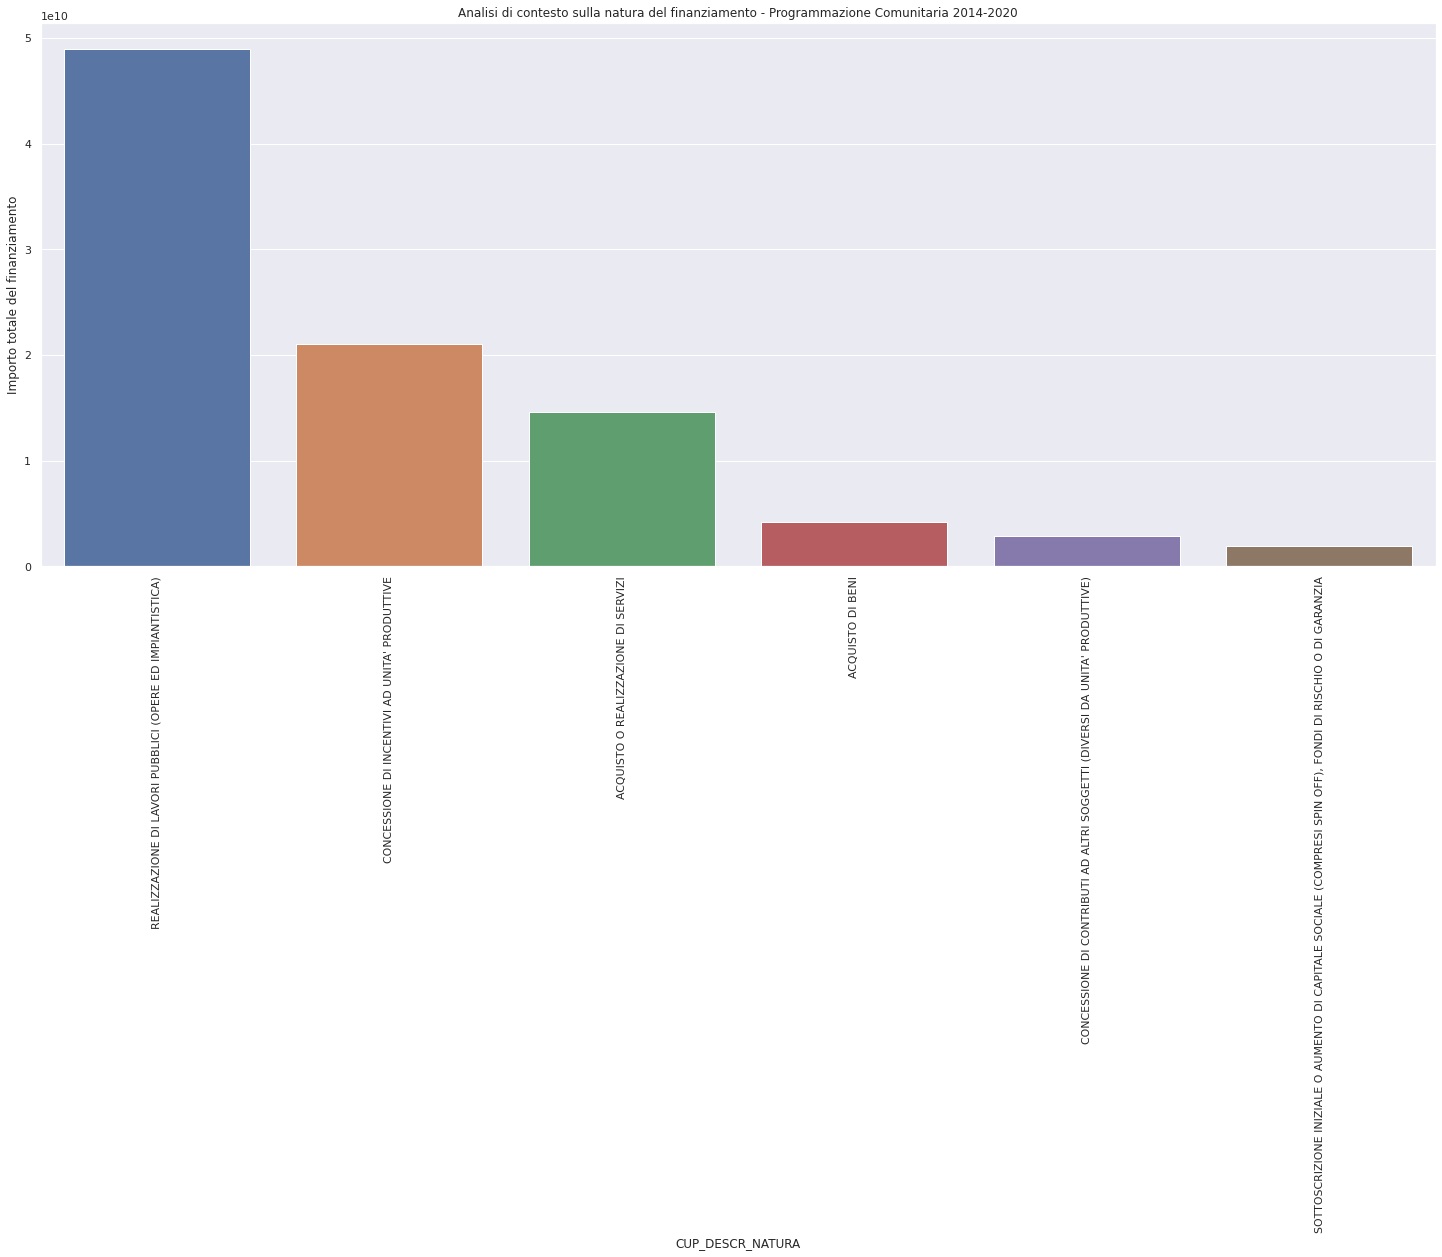

In [ ]:

PfProgetti1420CleanedDescrNatura=PfProgetti1420.groupby('CUP_DESCR_NATURA', as_index=False).sum().sort_values('FINANZ_TOTALE_PUBBLICO',ascending=False)
PfProgetti1420CleanedDescrNatura.head(20)
sb.set(rc={'figure.figsize':(25,10)})
grafic=sb.barplot(data=PfProgetti1420CleanedDescrNatura,x='CUP_DESCR_NATURA',y='FINANZ_TOTALE_PUBBLICO', ci=False)
pp.title("Analisi di contesto sulla natura del finanziamento - Programmazione Comunitaria 2014-2020")

pp.ylabel('Importo totale del finanziamento')
grafic.set_xticklabels(grafic.get_xticklabels(),rotation=90)




[Text(0, 0, 'REALIZZAZIONE DI LAVORI PUBBLICI (OPERE ED IMPIANTISTICA)'),
 Text(0, 0, 'ACQUISTO O REALIZZAZIONE DI SERVIZI'),
 Text(0, 0, "CONCESSIONE DI INCENTIVI AD UNITA' PRODUTTIVE"),
 Text(0, 0, 'ACQUISTO DI BENI'),
 Text(0, 0, "CONCESSIONE DI CONTRIBUTI AD ALTRI SOGGETTI (DIVERSI DA UNITA' PRODUTTIVE)"),
 Text(0, 0, 'SOTTOSCRIZIONE INIZIALE O AUMENTO DI CAPITALE SOCIALE (COMPRESI SPIN OFF), FONDI DI RISCHIO O DI GARANZIA'),
 Text(0, 0, ' ')]

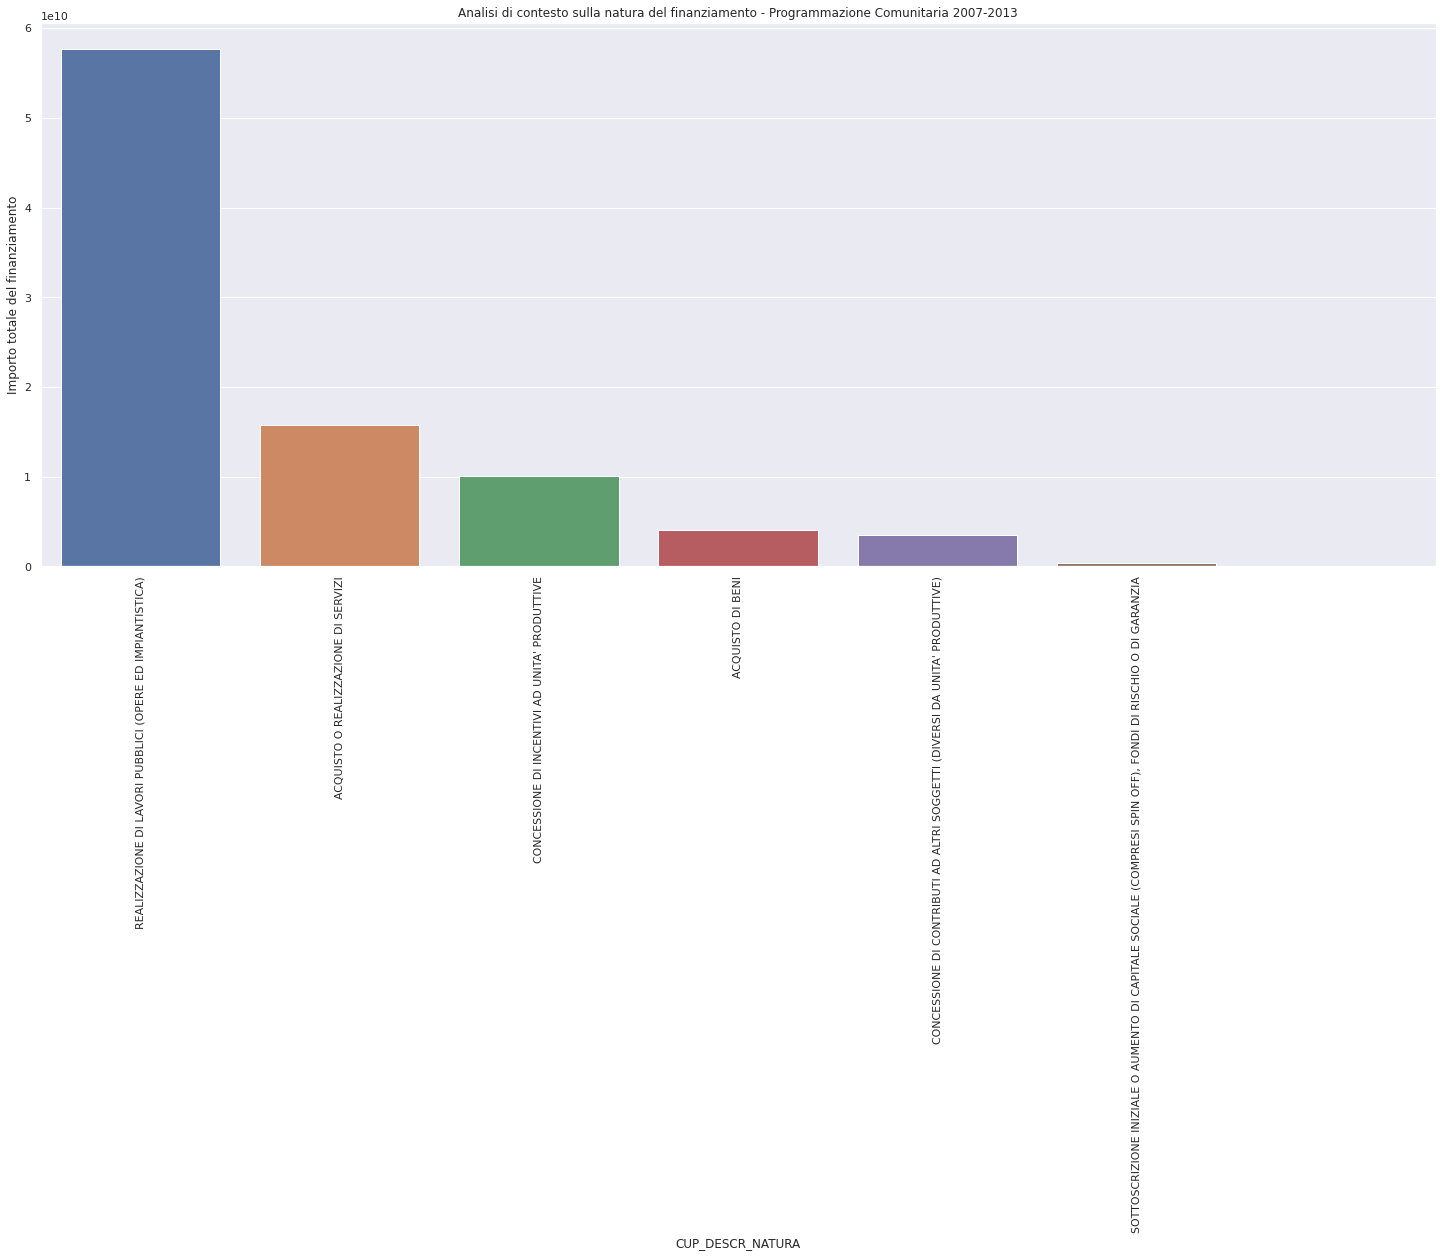

In [ ]:

PfProgetti0713CleanedDescrNatura=PfProgetti0713.groupby('CUP_DESCR_NATURA', as_index=False).sum().sort_values('FINANZ_TOTALE_PUBBLICO',ascending=False)
PfProgetti0713CleanedDescrNatura.head(20)
sb.set(rc={'figure.figsize':(25,10)})
grafic=sb.barplot(data=PfProgetti0713CleanedDescrNatura,x='CUP_DESCR_NATURA',y='FINANZ_TOTALE_PUBBLICO', ci=False)
pp.title("Analisi di contesto sulla natura del finanziamento - Programmazione Comunitaria 2007-2013")
pp.ylabel('Importo totale del finanziamento')
grafic.set_xticklabels(grafic.get_xticklabels(),rotation=90)




[Text(0, 0, 'Trasporti e infrastrutture a rete'),
 Text(0, 0, 'Ricerca e innovazione'),
 Text(0, 0, 'Ambiente e prevenzione dei rischi'),
 Text(0, 0, 'Occupazione e mobilità dei lavoratori'),
 Text(0, 0, 'Inclusione sociale'),
 Text(0, 0, 'Istruzione'),
 Text(0, 0, 'Attrazione culturale, naturale e turistica'),
 Text(0, 0, 'Competitività per le imprese'),
 Text(0, 0, 'Occupazione e mobilitï¿½ dei lavoratori'),
 Text(0, 0, 'Energia e efficienza energetica'),
 Text(0, 0, 'Agenda digitale'),
 Text(0, 0, 'Rafforzamento capacità della PA'),
 Text(0, 0, 'Competitivitï¿½ per le imprese'),
 Text(0, 0, 'Rafforzamento capacitï¿½ della PA'),
 Text(0, 0, 'Servizi di cura infanzia e anziani')]

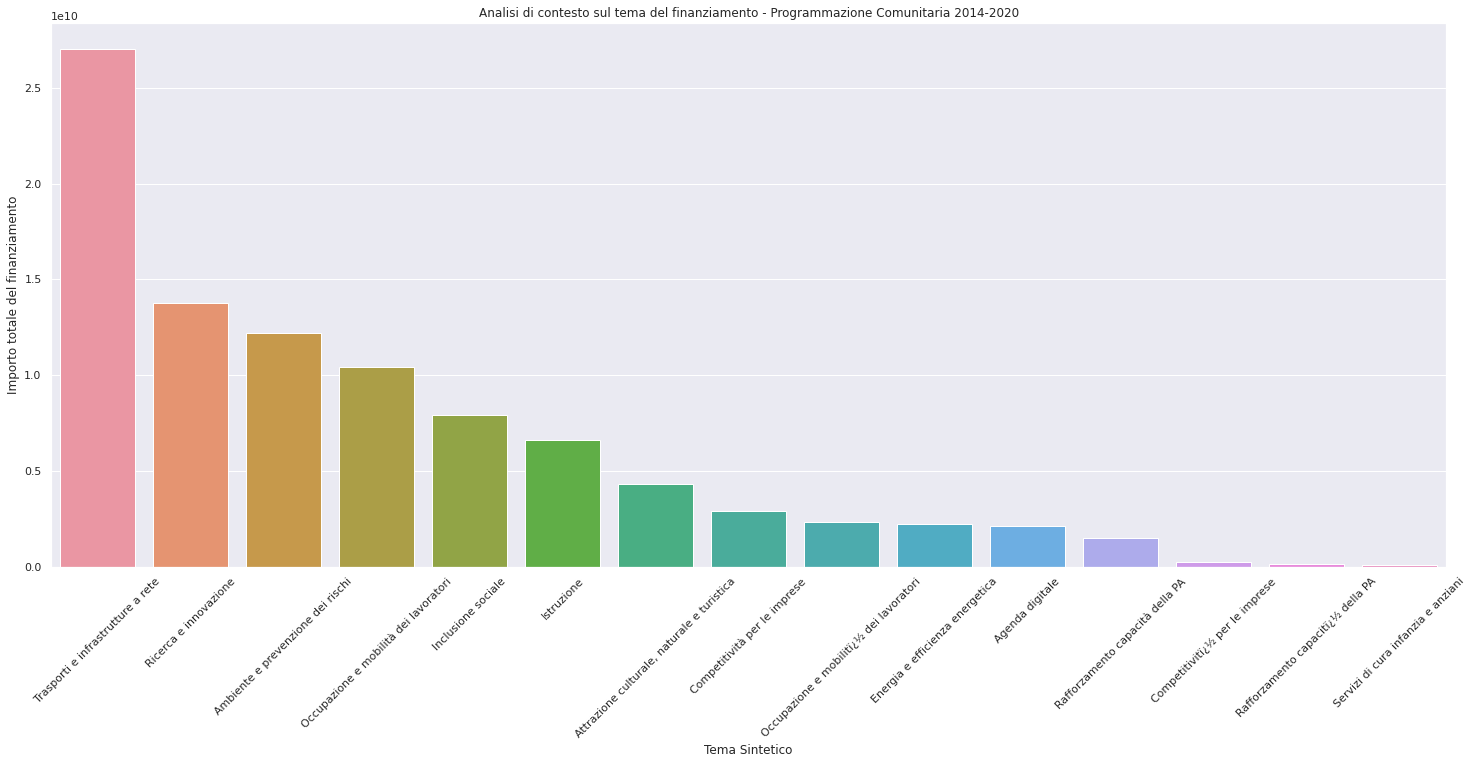

In [ ]:

PfProgetti1420CleanedDescTema=PfProgetti1420.groupby('OC_TEMA_SINTETICO', as_index=False).sum().sort_values('FINANZ_TOTALE_PUBBLICO',ascending=False)
PfProgetti1420CleanedDescTema.head(20)
sb.set(rc={'figure.figsize':(25,10)})
grafic=sb.barplot(data=PfProgetti1420CleanedDescTema,x='OC_TEMA_SINTETICO',y='FINANZ_TOTALE_PUBBLICO', ci=False)
pp.title("Analisi di contesto sul tema del finanziamento - Programmazione Comunitaria 2014-2020")
pp.ylabel('Importo totale del finanziamento')
grafic.set_xticklabels(grafic.get_xticklabels(),rotation=45)



[Text(0, 0, 'Trasporti e infrastrutture a rete'),
 Text(0, 0, 'Ambiente e prevenzione dei rischi'),
 Text(0, 0, 'Ricerca e innovazione'),
 Text(0, 0, 'Istruzione'),
 Text(0, 0, 'Attrazione culturale, naturale e turistica'),
 Text(0, 0, 'Occupazione e mobilità dei lavoratori'),
 Text(0, 0, 'Inclusione sociale'),
 Text(0, 0, 'Rinnovamento urbano  e rurale'),
 Text(0, 0, 'Energia e efficienza energetica'),
 Text(0, 0, 'Competitività per le imprese'),
 Text(0, 0, 'Agenda digitale'),
 Text(0, 0, 'Occupazione e mobilitï¿½ dei lavoratori'),
 Text(0, 0, 'Rafforzamento capacità della PA'),
 Text(0, 0, 'Servizi di cura infanzia e anziani'),
 Text(0, 0, 'Rafforzamento capacitï¿½ della PA'),
 Text(0, 0, 'Competitivitï¿½ per le imprese')]

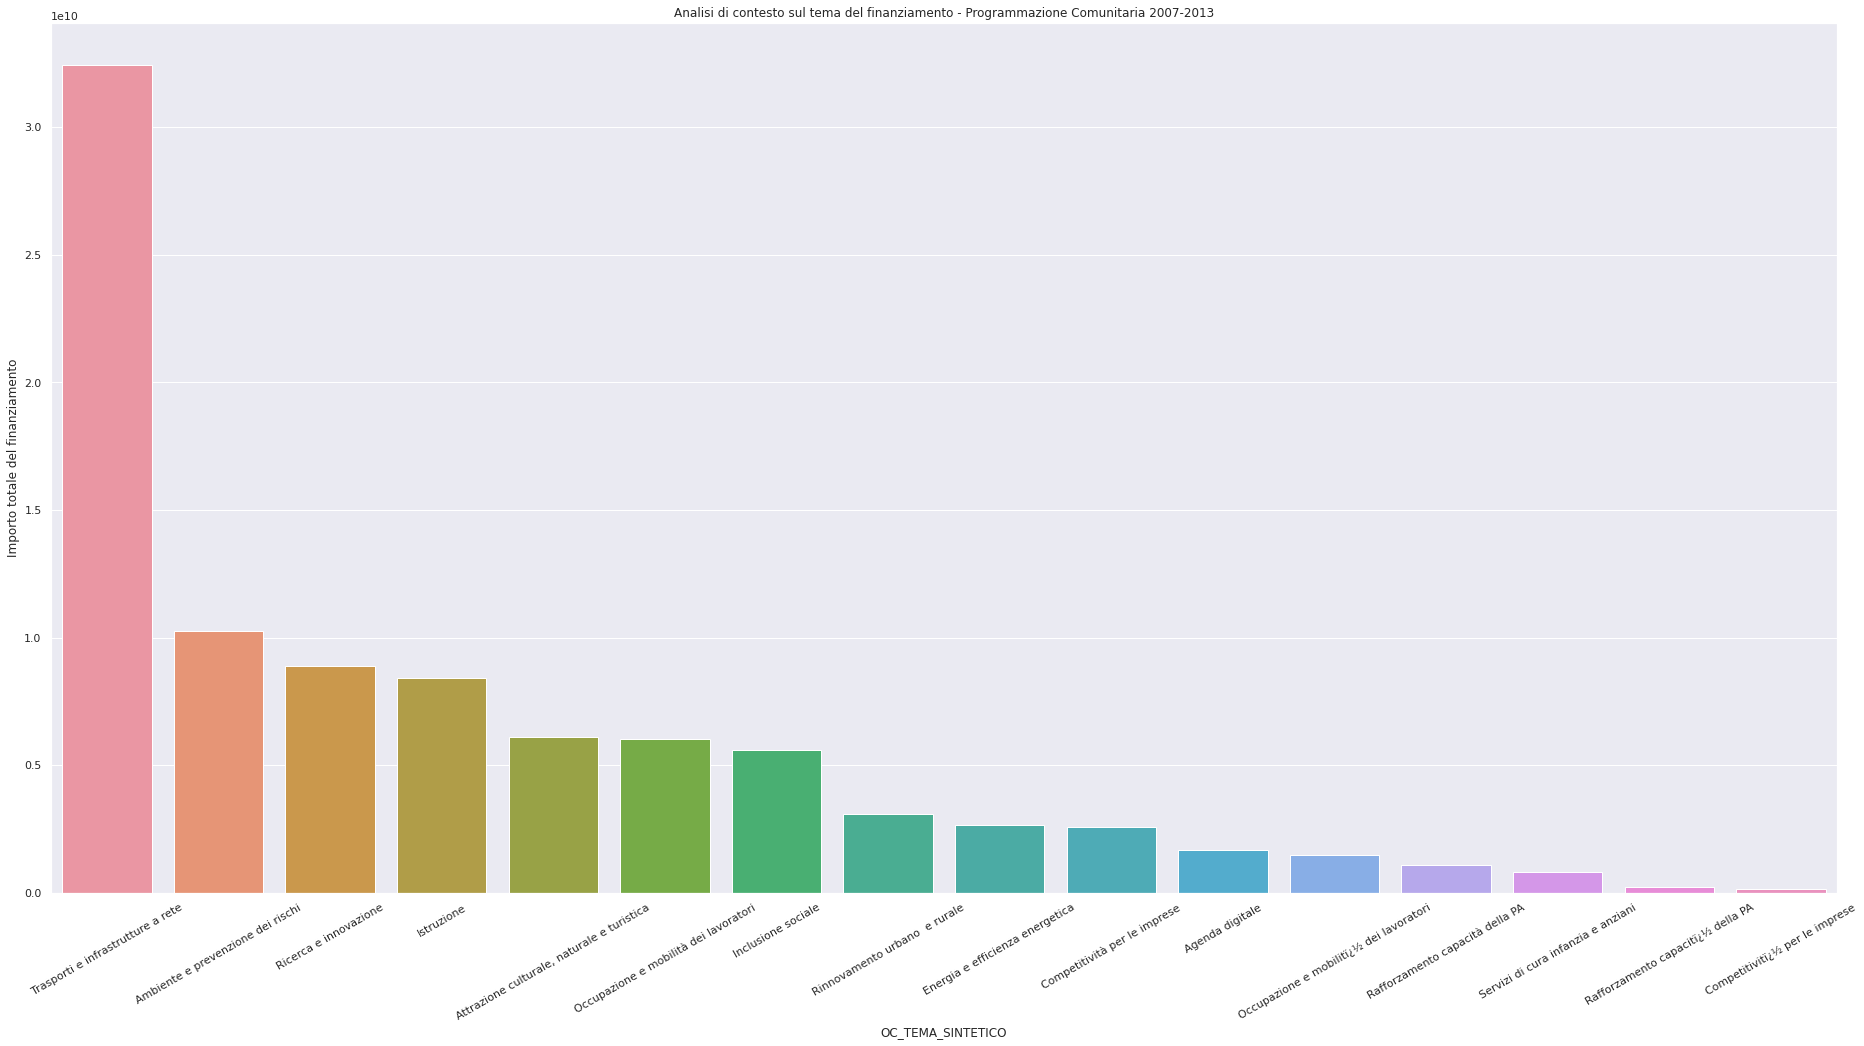

In [ ]:

PfProgetti0713CleanedDescTema=PfProgetti0713.groupby('OC_TEMA_SINTETICO', as_index=False).sum().sort_values('FINANZ_TOTALE_PUBBLICO',ascending=False)
PfProgetti0713CleanedDescTema.head(20)
sb.set(rc={'figure.figsize':(32,16)})
grafic=sb.barplot(data=PfProgetti0713CleanedDescTema,x='OC_TEMA_SINTETICO',y='FINANZ_TOTALE_PUBBLICO', ci=False)
pp.title("Analisi di contesto sul tema del finanziamento - Programmazione Comunitaria 2007-2013")
pp.ylabel('Importo totale del finanziamento')
grafic.set_xticklabels(grafic.get_xticklabels(),rotation=30)



[Text(0, 0, 'Nuova realizzazione'),
 Text(0, 0, 'Altro'),
 Text(0, 0, 'Ampliamento o potenziamento'),
 Text(0, 0, 'Incentivi al lavoro'),
 Text(0, 0, 'Manutenzione straordinaria'),
 Text(0, 0, 'Corsi di formazione'),
 Text(0, 0, 'Nuova fornitura'),
 Text(0, 0, "Attivita' di ricerca"),
 Text(0, 0, 'Ristrutturazione'),
 Text(0, 0, 'Recupero')]

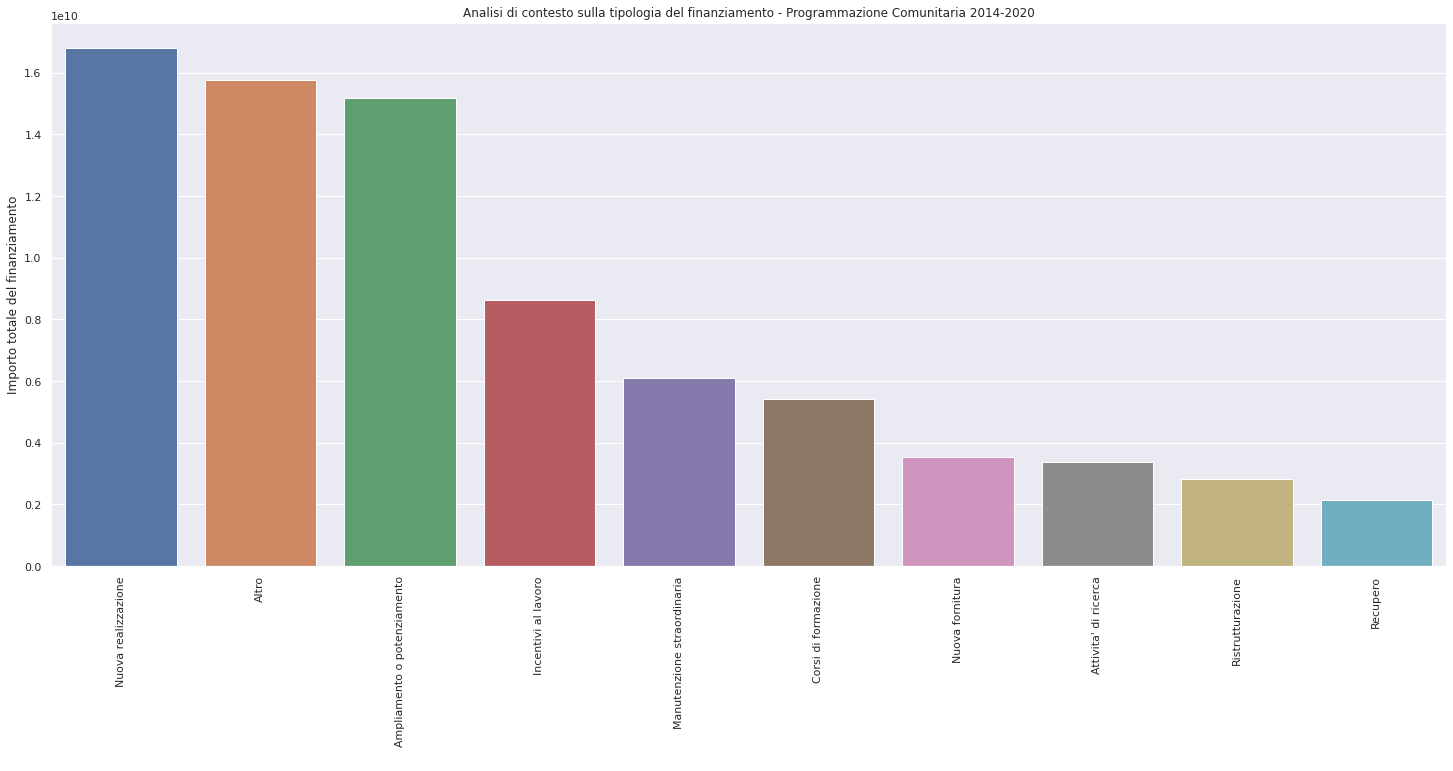

In [ ]:
PfProgetti1420CleanedDescTipologia=PfProgetti1420.groupby('CUP_DESCR_TIPOLOGIA',as_index=False).sum().sort_values('FINANZ_TOTALE_PUBBLICO',ascending=False).head(10)
PfProgetti1420CleanedDescTipologia.head(20)
sb.set(rc={'figure.figsize':(25,10)})
grafic=sb.barplot(data=PfProgetti1420CleanedDescTipologia,x='CUP_DESCR_TIPOLOGIA',y='FINANZ_TOTALE_PUBBLICO', ci=False)
pp.title("Analisi di contesto sulla tipologia del finanziamento - Programmazione Comunitaria 2014-2020")
pp.xlabel(' ')
pp.ylabel('Importo totale del finanziamento')
grafic.set_xticklabels(grafic.get_xticklabels(),rotation=90)



[Text(0, 0, 'AMPLIAMENTO (COMPRESA SOPRAELEVAZIONE) O POTENZIAMENTO'),
 Text(0, 0, 'NUOVA REALIZZAZIONE'),
 Text(0, 0, 'ALTRO'),
 Text(0, 0, 'MANUTENZIONE STRAORDINARIA'),
 Text(0, 0, 'CORSI DI FORMAZIONE'),
 Text(0, 0, 'NUOVA FORNITURA'),
 Text(0, 0, "RISTRUTTURAZIONE (PER CAMBIO DI DESTINAZIONE D'USO)"),
 Text(0, 0, 'RECUPERO'),
 Text(0, 0, "ATTIVITA' DI RICERCA"),
 Text(0, 0, 'RESTAURO')]

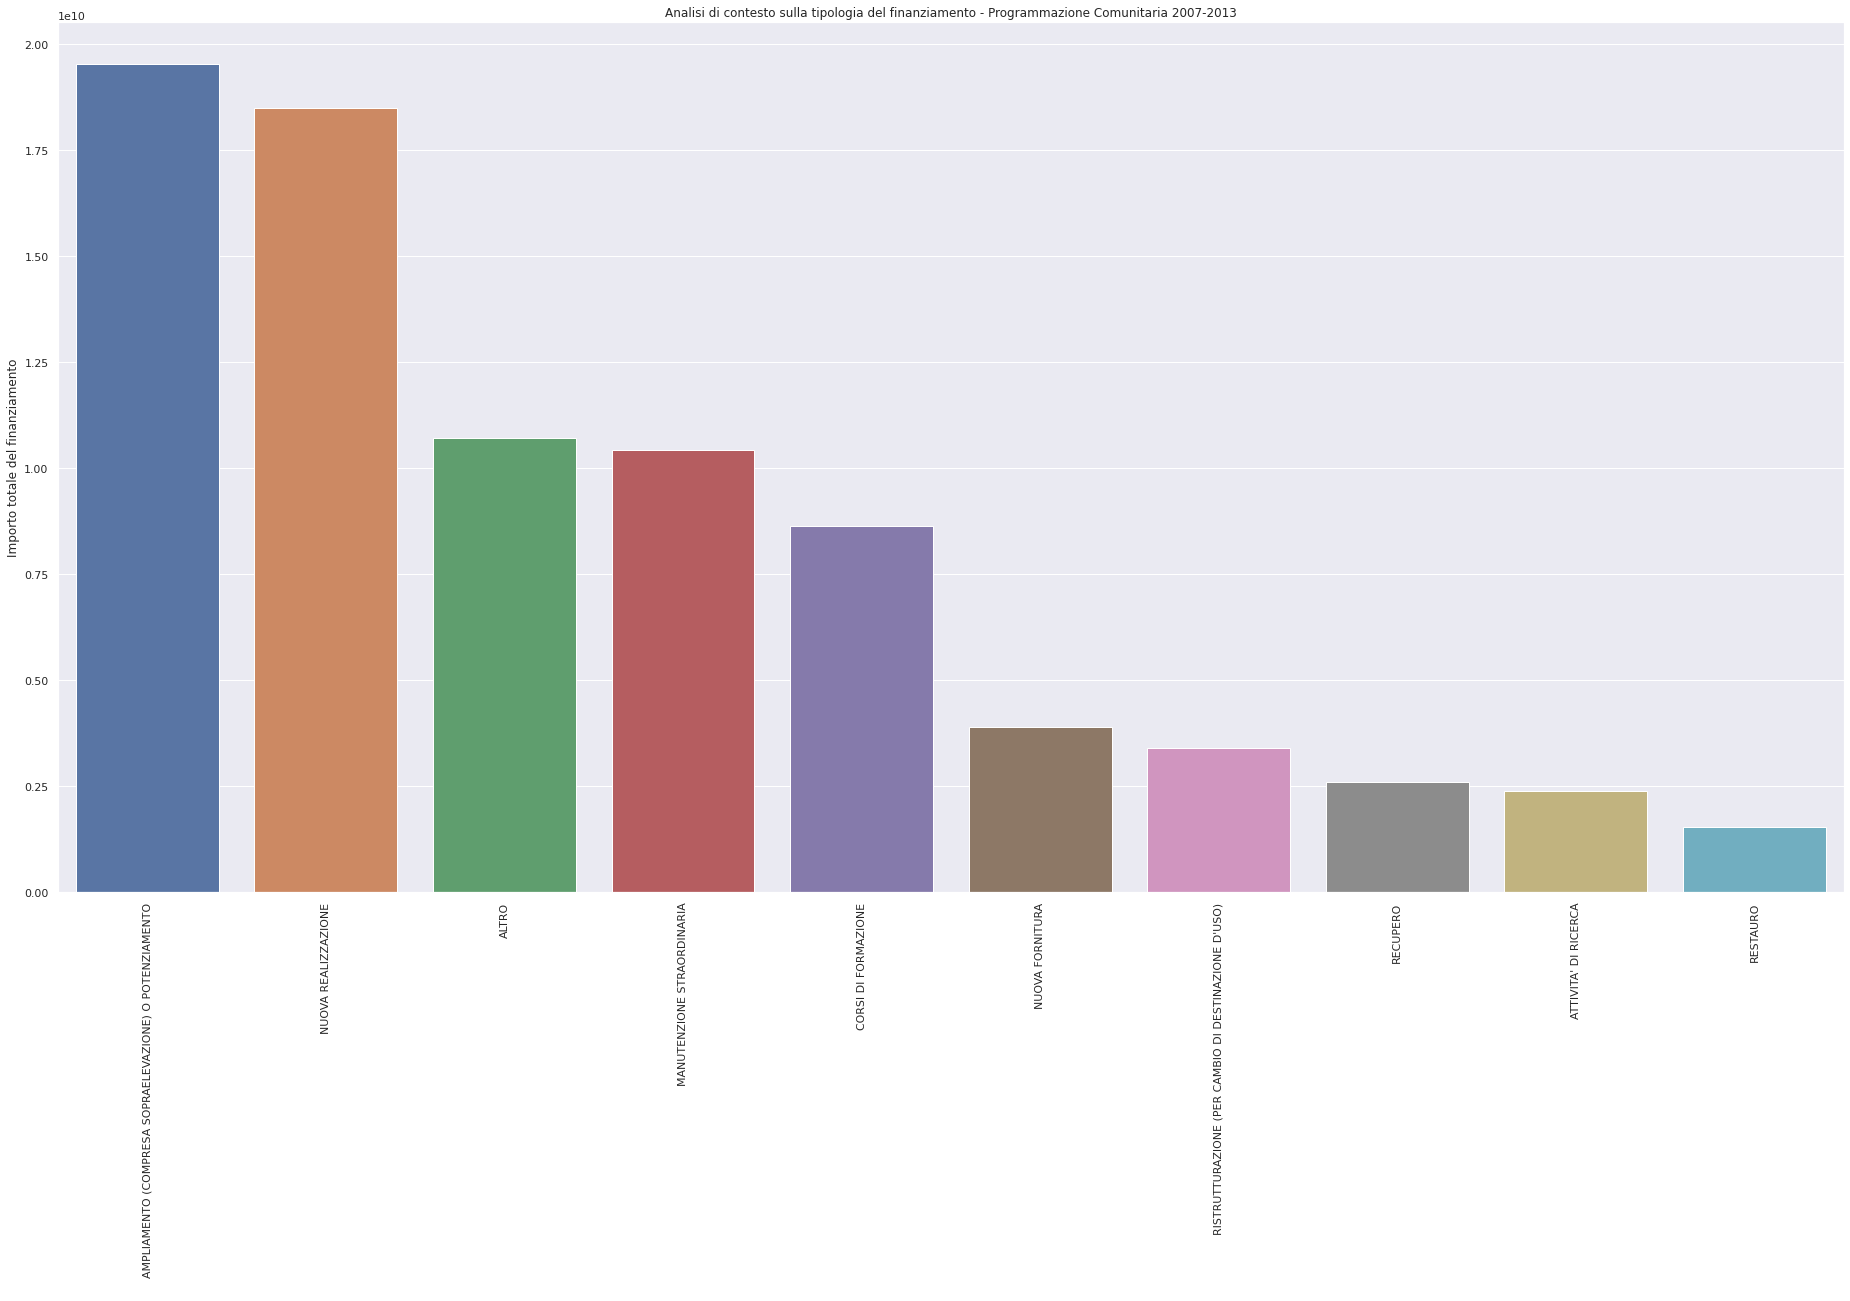

In [ ]:
PfProgetti0713CleanedDescTipologia=PfProgetti0713.groupby('CUP_DESCR_TIPOLOGIA',as_index=False).sum().sort_values('FINANZ_TOTALE_PUBBLICO',ascending=False).head(10)
PfProgetti0713CleanedDescTipologia.head(20)
sb.set(rc={'figure.figsize':(32,16)})
grafic=sb.barplot(data=PfProgetti0713CleanedDescTipologia,x='CUP_DESCR_TIPOLOGIA',y='FINANZ_TOTALE_PUBBLICO', ci=False)
pp.title("Analisi di contesto sulla tipologia del finanziamento - Programmazione Comunitaria 2007-2013")
pp.xlabel(' ')
pp.ylabel('Importo totale del finanziamento')
grafic.set_xticklabels(grafic.get_xticklabels(),rotation=90)

